In [1]:
import os, sys
#os.chdir
os.getcwd()

import pickle
import numpy as np

from time import time
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

import pandas as pd
from sklearn import manifold
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
import random

import copy

os.getcwd()

/home/slcf-hserver-04/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/slcf-hserver-04/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/slcf-hserver-04/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a 

'/home/slcf-hserver-04/saerom/word2vec_codes/codes'

In [8]:
data_path = '../data'
category = 'kitchen'
unla_ratio = [0.3,0.4,0.5,0.6,0.7]
rr = unla_ratio[0]


beta = [0.01,0.02,0.03,0.05]
docvecs_list = []

for be in beta:
    f = open('../results/'+category+'_doc2vec_dbow_neighbor_'+str(rr)+'_beta_'+str(be)+'_data.pickle','rb')
    docvecs = pickle.load(f)
    f.close()
    docvecs_list.append(docvecs)

In [36]:
data_path = '../data'
year = '2007'
unla_ratio = [0.3,0.4,0.5,0.6,0.7]
rr = unla_ratio[2]


beta = [0.01,0.02,0.03,0.05]
docvecs_list = []

for be in beta:
    f = open('../results/yelp_'+year+'_doc2vec_dbow_neighbor_'+str(rr)+'_beta_'+str(be)+'_data.pickle','rb')
    docvecs = pickle.load(f)
    f.close()
    docvecs_list.append(docvecs)

In [37]:
beta_idx = 0
be = beta[beta_idx]
docvecs = docvecs_list[beta_idx]

doc_vec = []

for doc in docvecs['docvec']:
    doc_vec.append(list(doc))
doc_vec = np.array(doc_vec)

true_label = docvecs['true_label']
train_label = np.array(docvecs['train_label'],copy = True)

train_idx = (train_label !=0)
train_data = copy.deepcopy(doc_vec[train_idx,:])
trainy = copy.deepcopy(true_label[train_idx])

test_idx = (train_label ==0)
test_data = copy.deepcopy(doc_vec[test_idx,:])
testy = copy.deepcopy(true_label[test_idx])

testY = (testy>3)
#testY = copy.deepcopy(testy)


trainx, testx, trainy, testy = train_test_split(test_data,testY, test_size = 0.3,random_state=3)

In [40]:
trainx, testx, trainy, testy = train_test_split(test_data,testY, test_size = 0.3,random_state=3)

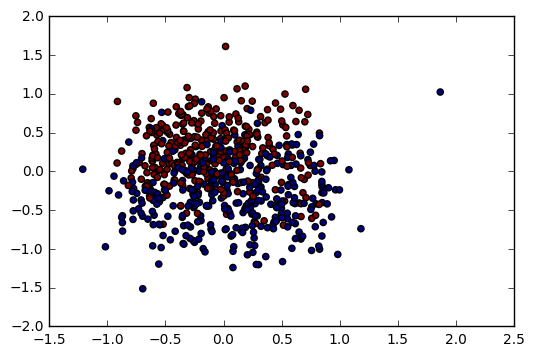

In [38]:
pca = PCA(n_components = 2)
trainx = pca.fit_transform(trainx)
testx = pca.transform(testx)
plt.scatter(testx[:,0],testx[:,1],c = testy)
plt.savefig(data_path+'/results/plots/'+'category'+'_dbow_neighbor_'+str(rr)+'_beta_'+str(be)+'_figure.png')
plt.show()

In [41]:
scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)

testx = scaler.transform(testx)

print('training phase')
clf = svm.SVC(C = 10,gamma = 0.01)
clf.fit(trainx,trainy)

print('test phase')
predicts = clf.predict(testx)

print('svm: measure phase')
print(confusion_matrix(testy,predicts))
print(accuracy_score(testy,predicts))



training phase
test phase
svm: measure phase
[[294  45]
 [ 56 278]]
0.849925705795
